In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

## Load Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [ ]:
# Normalizing is very IMPORTANT FOR PERFORMANCE ACCURACY
X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

## Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.1
    )

# Fit the generator on the training data
# train_datagen.fit(X_train)

train_generated=train_datagen.flow(X_train,y_train,batch_size=32)

## Load VGG-19

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
conv_base = VGG19(weights='imagenet',include_top=False,input_shape=(32,32,3))

## Model Building

In [ ]:
conv_base.trainable = False
for layer in conv_base.layers:
  if layer.name[:6] == 'block5':
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_14 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_conv4 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_conv4 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_conv4 True
block5_pool True


In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,420,938 (77.90 MB)

 Trainable params: 9,835,786 (37.52 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generated,epochs=15,validation_data=(X_test, y_test), batch_size=32)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.3201 - loss: 2.0232 - val_accuracy: 0.6035 - val_loss: 1.2465
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5902 - loss: 1.2460 - val_accuracy: 0.6420 - val_loss: 1.0982
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6145 - loss: 1.1853 - val_accuracy: 0.6489 - val_loss: 1.1111
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6295 - loss: 1.1502 - val_accuracy: 0.6683 - val_loss: 1.0718
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6402 - loss: 1.1250 - val_accuracy: 0.6335 - val_loss: 1.2986
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6476 - loss: 1.1096 - val_accuracy: 0.6832 - val_loss: 1.0601
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6480 - loss: 1.1084 - val_accuracy: 0.6627 - val_loss: 1.1870
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6580 -

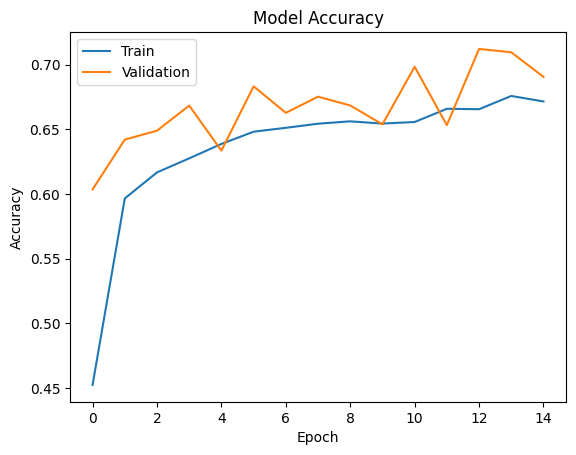

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')

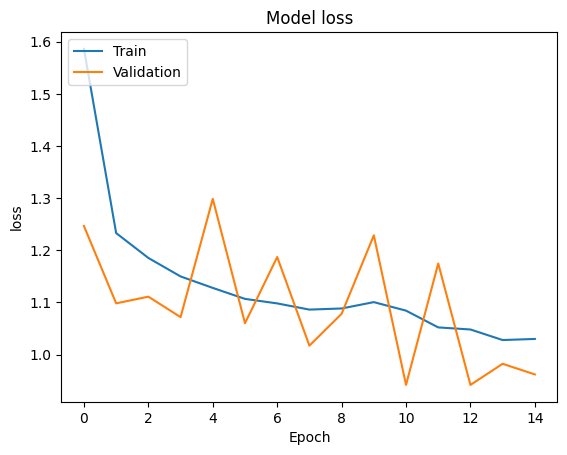

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# image scaling from 255 to 0,1
# fine tuning instead of feature extraction
# data augmentation
# image resizing acc to pre trained model used